# Data Wrangling and Analysis on WeRateDogs Twitter Account

# Table of Contents

- Introduction
- Gathering
- Assessing
- Cleaning
- Analysis

## Introduction

WeRateDogs is a Twitter account that rates people's dogs with a comical twist.  We will be wrangling data from this “puppular” account and transform them into useful analyses and visualizations. 

We will first obtain raw data via the Twitter API and assess them for quality and tidiness issues.  We will then define all the necessary cleaning tasks and convert them to actual codes.  Finally, we will use the resulted output for exploratory data analysis to gain key insights.

In [1]:
import pandas as pd
import requests
import os
import tweepy
import json
import numpy as np

## Gathering

1. twitter_archive_enhanced.csv - Manual upload (archive_df)
2. tweet_json.txt - Twitter API to JSON (tweet_df)
3. image_predictions.tsv - Programmatic download (prediction_df)

### 1. twitter_archive_enhanced.csv - Manual upload

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

### 2. tweet_json.txt - Twitter API to JSON

In [3]:
#Twitter account info (Hidden due to security reasons)
consumer_key = 'XXXX'
consumer_secret = 'XXXX'
access_token = 'XXXX'
access_secret = 'XXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True) #display twitter's rate limit

In [ ]:
#Putting query into a dictionary and converting to json after
complete_json = {}
error_list = []
for i in range(len(archive_df.tweet_id)):
    try:
        status = api.get_status(archive_df.tweet_id[i], tweet_mode='extended')
        complete_json.update({i : status._json})
    except Exception as e:
        print(archive_df.tweet_id[i], e)
        error_list.append(archive_df.tweet_id[i])
        

In [4]:
#Create tweet_json.txt if and only if it doesn't exist in the directory
try:
    with open('tweet_json.txt','x') as file:
        json.dump(complete_json, file)
#If file exists already, pass and go to the next line
except FileExistsError:
    pass

In [5]:
#Reading JSON from tweet_json.txt
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)

In [6]:
#New list that only contains relevant info for this project
filtered_list = []

for i in data.keys():
    tweet_id = data[i]['id']
    retweet_count = data[i]['retweet_count']
    favorite_count = data[i]['favorite_count']
    filtered_list.append({'tweet_id' : tweet_id,
                         'retweet_count': retweet_count,
                         'favorite_count': favorite_count})

In [7]:
#Convert into a separate pandas DataFrame for future analaysis
tweet_df = pd.DataFrame(filtered_list, columns = ['tweet_id',
                                      'retweet_count',
                                       'favorite_count'
                                      ])

### 3. image_predictions.tsv - Progammatic download

In [8]:
#Create a seperate folder for the file we are going to download programmatically
folder_name = 'predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [9]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [10]:
prediction_df = pd.read_csv('predictions/image-predictions.tsv', sep='\t')

## Assessing

### 1.archive_df

In [11]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#Check to see if there is any duplicated tweet
archive_df[archive_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [14]:
#Check to see if there is any retweet from own account
archive_df[archive_df.retweeted_status_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [15]:
archive_df.retweeted_status_user_id.value_counts() ###confirm 4.196984e+09 is dog_rates own account via twitter

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [16]:
#Check for 0 in denominator, since we cannot divide a number by 0.
archive_df.sort_values('rating_denominator').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
1576,687460506001633280,NaN,NaN,2016-01-14 02:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kramer. He's a Picasso Tortellini. Tie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687460506...,10,10,Kramer,None,None,None,None
1575,687476254459715584,NaN,NaN,2016-01-14 03:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Curtis. He's a fluffball. 11/10 would ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687476254...,11,10,Curtis,None,None,pupper,None


In [17]:
#Take a closer look at the denominator
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
#Investigate the inconsistencies in denominator
archive_df.query('rating_denominator % 10 != 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [19]:
#Inspect whether there are any entries with multiple dog stages by using get_dummies
dummies = pd.get_dummies(data= archive_df, columns=['doggo', 'floofer', 'pupper', 'puppo'])
dummies.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo_None,doggo_doggo,floofer_None,floofer_floofer,pupper_None,pupper_pupper,puppo_None,puppo_puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,1,0,1,0,1,0,1,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,1,0,1,0,1,0,1,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10,Archie,1,0,1,0,1,0,1,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,10,Darla,1,0,1,0,1,0,1,0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,10,Franklin,1,0,1,0,1,0,1,0


In [20]:
#Omit all the 'none' columns from calculation
dummies.drop(['doggo_None','floofer_None','pupper_None','puppo_None'], axis=1, inplace=True)
dummies['totals']= dummies.doggo_doggo +  dummies.floofer_floofer + dummies.pupper_pupper + dummies.puppo_puppo

#Reflect entries with more than 1 dog stage registered
dummies.query('totals > 1')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo_doggo,floofer_floofer,pupper_pupper,puppo_puppo,totals
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,1,0,0,1,2
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,1,1,0,0,2
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,1,0,1,0,2
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,1,0,1,0,2
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,1,0,1,0,2
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,1,0,1,0,2
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,1,0,1,0,2
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,1,0,1,0,2
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,1,0,1,0,2
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,1,0,1,0,2


In [21]:
#Capture tweet id with multiple dog stages
multi_dogstages = dummies.query('totals >1').tweet_id

In [22]:
#Check whether there is any non-name value
archive_df.name.value_counts().head()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Bailey         7
Toby           7
Buddy          7
an             7
Daisy          7
Jax            6
Koda           6
Jack           6
Scout          6
Stanley        6
Rusty          6
Milo           6
Oscar          6
Bella          6
Leo            6
Dave           6
Phil           5
            ... 
Mojo           1
Jennifur       1
Jareld         1
Jeffri         1
Derby          1
Henry          1
Einstein       1
Hermione       1
Bert           1
Sora           1
Crawford       1
Sky            1
Maya           1
Koko           1
Rodman         1
Alexander      1
Leonidas       1
old            1
Eriq           1
Edd            1
DonDon         1
Striker        1
Zeek           1
Anna           1
Brooks         1
Olaf           1
Milky          1
Alfy          

### 2. tweet_df

In [23]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7942,37141
1,892177421306343426,5900,31943
2,891815181378084864,3900,24064
3,891689557279858688,8097,40458
4,891327558926688256,8781,38681


In [24]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [25]:
#Check to see if there is any NA value
tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [26]:
#Check to see if there is any duplicated tweet
tweet_df[tweet_df.duplicated()]

,tweet_id,retweet_count,favorite_count


### 3. prediction_df

In [27]:
prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
#Check to see if there any duplicated tweets
prediction_df[prediction_df.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [30]:
#Any non-dog entries
prediction_df.query('p1_dog == False & p2_dog == False & p3_dog == False').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

### Quality issues 

#### archive_df
1. Tweet_id and retweeted_status_id should be _string_ data type, not integers
2. Convert timestamp and retweeted_status_timestamp columns to datetime
3. Delete retweets with retweeted_status_user_id as 4196983835, those are duplicates (retweets from @dog_rates own account).  
5. Remove entries with 0 in the denominator (cannot divide by zero)
6. Remove entries with denominators that are not a factor of 10 (inconsistency)
7. Remove ratings that are outliners (based on 99th percentile)
8. Remove tweets with multiple dog stages.  Since we are unable to figure out the appropiate dog stage for tweets with multiple entries, we will omit them from our analysis this time.
9. Replace non-name values such as 'a', 'the', 'an', etc... with 'None'

#### tweet_df
1. Tweet_id should be _string_ data type, not integers

#### prediction_df
1. Tweet_id should be _string_ data type, not integers
2. Remove non dog entries (entries that have p1_dog, p2_dog and p3_dog all returning false)
3. Standardize capitalizations on prediction names
4. Use values in p1_dog, p2_dog and p3_dog to determine the actual dog breed.

### Tidiness issues

#### archive_df
1. Melt all the dog stage variables to a single column.   The data type for this new column should be _catergory_.
2. A normalized rating should be calculated by dividing rating_numerator by rating_denominator for the ease of comparsion.

#### applies to all
1. Combine tables by tweet_id and include only relevant information for analysis

## Cleaning

### Create a copy of all three files

In [31]:
archive_clean = archive_df.copy()
tweet_clean =  tweet_df.copy()
predict_clean = prediction_df.copy()

### 1. archive_clean

#### Tweet_id and retweeted_status_id should be _string_, not integers

In [32]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
archive_clean.retweeted_status_user_id = archive_clean.retweeted_status_user_id.astype(str)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(str)

#### _Test_

In [33]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(2), 

#### Convert timestamp and retweeted_status_timestamp columns to datetime

In [34]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)

#### _Test_

In [35]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: dateti

#### Delete retweets with retweeted_status_user_id as 4196983835

In [36]:
###Convert all the nan to null values
archive_clean.retweeted_status_user_id = archive_clean.retweeted_status_user_id.replace('nan', np.nan)
###Get rid of the decimals in retweeted_status_user_id which was created as a result of data type conversion
archive_clean.retweeted_status_user_id = archive_clean.retweeted_status_user_id.str[:-2]

In [37]:
###Delete entries with retweeted_status_user_id as 4196983835
archive_clean = archive_clean[archive_clean['retweeted_status_user_id'] != '4196983835']

#### _Test_

In [38]:
archive_clean.retweeted_status_user_id.value_counts()

4296831739         2
44667502           1
811740824          1
58709723           1
487197737          1
24885566           1
363890752          1
66699013           1
280479778          1
597064155          1
726634734          1
154767397          1
41198418           1
1732729088         1
1228325660         1
512804507          1
19607400           1
341021133          1
7.47554344435e+    1
7.87461778435e+    1
7.12457247235e+    1
79923701           1
195036846          1
783214             1
Name: retweeted_status_user_id, dtype: int64

#### Remove entries with 0 in the denominator

In [39]:
archive_clean = archive_clean[archive_clean['rating_denominator'] != 0]

#### _Test_

In [40]:
archive_clean[archive_clean['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Remove entries with denominators that are inconsistent with the rating system

In [41]:
archive_clean = archive_clean[archive_clean['rating_denominator'] % 10 == 0]

#### _Test_

In [42]:
archive_clean[archive_clean['rating_denominator'] % 10 != 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Create a normalized rating column

In [43]:
archive_clean['true_rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

In [44]:
archive_clean.true_rating = archive_clean.true_rating.round(2)

#### _Test_

In [45]:
archive_clean.sort_values(by=['true_rating'], ascending=False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,true_rating
979,749981277374128128,NaN,nan,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None,177.6
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaT,NaN,666,10,None,None,None,None,None,66.6
2074,670842764863651840,NaN,nan,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None,42.0
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaT,NaN,420,10,None,None,None,None,None,42.0
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaT,NaN,182,10,None,None,None,None,None,18.2
695,786709082849828864,NaN,nan,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,7.5
763,778027034220126208,NaN,nan,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,2.7
1712,680494726643068929,NaN,nan,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None,2.6
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaT,NaN,17,10,None,None,None,None,None,1.7
285,838916489579200512,NaN,nan,2017-03-07 00:57:32,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,811740824,2017-03-07 00:15:46,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None,1.5


#### Determine and delete outliners

In [46]:
###Determine cutoff line.  For simplicity reasons, we will use the 99th percentile as the cutoff

archive_clean.true_rating.quantile(0.99)

1.4

In [47]:
###Remove all entries that have true_rating > 1.4

archive_clean = archive_clean[archive_clean['true_rating'] <= 1.4]

#### _Test_

In [48]:
archive_clean.true_rating.describe()

count    2182.000000
mean        1.062649
std         0.220485
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: true_rating, dtype: float64

### Delete tweets with multiple dog stages and melt dog stages into a single column.

In [49]:
###Recall the list of tweets with multiple dog stages from earlier
multi_dogstages

191     855851453814013952
200     854010172552949760
460     817777686764523521
531     808106460588765185
565     802265048156610565
575     801115127852503040
705     785639753186217984
733     781308096455073793
778     775898661951791106
822     770093767776997377
889     759793422261743616
956     751583847268179968
1063    741067306818797568
1113    733109485275860992
Name: tweet_id, dtype: int64

In [50]:
###Write a for loop that deletes tweets in the multi_dogstages list
for i in multi_dogstages.index:
    try:
        archive_clean = archive_clean.drop(i)
    except:
        print('Index {} was already deleted previously'.format(i))
    

Index 778 was already deleted previously
Index 822 was already deleted previously


In [51]:
###Do a value_count so that we can cross check these values after we melt the columns
print('Doggo = {}'.format(archive_clean.doggo.value_counts()[1]))
print('Floofer = {}'.format(archive_clean.floofer.value_counts()[1]))
print('Pupper = {}'.format(archive_clean.pupper.value_counts()[1]))
print('Puppo = {}'.format(archive_clean.puppo.value_counts()[1]))

Doggo = 75
Floofer = 9
Pupper = 227
Puppo = 24


In [52]:
###Melt all the dog stages into a single column
header = archive_clean.columns.difference(['doggo','floofer', 'pupper', 'puppo'])
archive_clean = pd.melt(archive_clean, id_vars= header, var_name='var1', value_name='dog_stage')
archive_clean.drop('var1', axis=1, inplace=True)

In [53]:
###Delete duplicates
archive_clean.drop_duplicates(inplace=True)
###Delete 
archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep='last', inplace=True)

#### _Test_

In [54]:
archive_clean.dog_stage.value_counts()

###These values concur with the pre-melt numbers

None       2170
pupper      227
doggo        75
puppo        24
floofer       9
Name: dog_stage, dtype: int64

### Replace non-name values with 'None'

In [55]:
#Compile a list that captures non-name values.  We assume all non-name values only contains lower case alphabets
non_name = archive_clean[archive_clean.name.str.islower()].name.unique()
non_name = list(non_name)

In [56]:
#Run a for loop that replaces all non-name values with 'None'
for i in non_name:
        archive_clean['name'] = archive_clean['name'].replace(i, 'None')

#### _Test_

In [57]:
archive_clean[archive_clean.name.str.islower()]

,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,name,rating_denominator,rating_numerator,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,source,text,timestamp,true_rating,tweet_id,dog_stage


### 2. tweet_clean

#### Tweet_id should be _string_, not integers

In [58]:
tweet_clean.tweet_id = tweet_clean.tweet_id.astype(str)

#### _Test_

In [59]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null object
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


### 3. predict_clean

#### Tweet_id should be _string_, not integers

In [60]:
predict_clean.tweet_id = predict_clean.tweet_id.astype(str)

#### _Test_

In [61]:
predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Remove non dog entries

In [62]:
predict_clean = predict_clean.query('p1_dog != False or p2_dog != False or p3_dog != False')

#### _Test_

In [63]:
predict_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Standardize capitalization on prediction names

In [64]:
predict_clean.p1 = predict_clean.p1.str.lower()
predict_clean.p2 = predict_clean.p2.str.lower()
predict_clean.p3 = predict_clean.p3.str.lower()

#### _Test_

In [65]:
#Check whether the given strings have at least one uppercase character
print(predict_clean.p1.str.isupper().sum())
print(predict_clean.p2.str.isupper().sum())
print(predict_clean.p3.str.isupper().sum())

0
0
0


#### Determine dog breed

In [66]:
#Write a for loop that determines the type of dog based on confidence level and put that value in a seperate column
dog_breed=[] #Store dog breed to a list and add it back to the predict_clean table later

for i, r in predict_clean.iterrows():
    if predict_clean.loc[i].p1_dog == True:
        dog_breed.append(predict_clean.loc[i].p1)
    elif predict_clean.loc[i].p2_dog == True:
        dog_breed.append(predict_clean.loc[i].p2)
    else:
        dog_breed.append(predict_clean.loc[i].p3)
        
predict_clean['dog_breed'] = dog_breed

#### _Test_

In [67]:
predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 13 columns):
tweet_id     1751 non-null object
jpg_url      1751 non-null object
img_num      1751 non-null int64
p1           1751 non-null object
p1_conf      1751 non-null float64
p1_dog       1751 non-null bool
p2           1751 non-null object
p2_conf      1751 non-null float64
p2_dog       1751 non-null bool
p3           1751 non-null object
p3_conf      1751 non-null float64
p3_dog       1751 non-null bool
dog_breed    1751 non-null object
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 235.6+ KB


In [68]:
predict_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
192,669567591774625800,https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg,1,chihuahua,0.980511,True,toy_terrier,0.009166,True,miniature_pinscher,0.002659,True,chihuahua
1401,768855141948723200,https://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg,1,chow,0.720219,True,brabancon_griffon,0.058365,True,rottweiler,0.055114,True,chow
250,670691627984359425,https://pbs.twimg.com/media/CU7GehOUYAA9nn-.jpg,1,shetland_sheepdog,0.071124,True,home_theater,0.068398,False,american_staffordshire_terrier,0.066964,True,shetland_sheepdog
1830,836260088725786625,https://pbs.twimg.com/media/C5r-G2IUwAA6KBY.jpg,1,borzoi,0.564688,True,ice_bear,0.078267,False,pembroke,0.057916,True,borzoi
2031,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,0.949562,True,labrador_retriever,0.045948,True,kuvasz,0.002471,True,golden_retriever
1365,761599872357261312,https://pbs.twimg.com/media/CpG_CrlWYAYyuP3.jpg,1,gordon_setter,0.240427,True,saluki,0.224269,True,doberman,0.129730,True,gordon_setter
1070,716285507865542656,https://pbs.twimg.com/media/CfDB3aJXEAAEZNv.jpg,1,yorkshire_terrier,0.430420,True,silky_terrier,0.196769,True,cairn,0.072676,True,yorkshire_terrier
1220,743980027717509120,https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg,1,bull_mastiff,0.975730,True,rhodesian_ridgeback,0.008073,True,pug,0.005571,True,bull_mastiff
1765,826598365270007810,https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg,1,french_bulldog,0.628119,True,siamese_cat,0.117397,False,cougar,0.082765,False,french_bulldog
1930,858843525470990336,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1,golden_retriever,0.578120,True,labrador_retriever,0.286059,True,bloodhound,0.026917,True,golden_retriever


### Merge

In [69]:
twitter_archive_master = pd.merge(archive_clean, tweet_clean, on=['tweet_id'], how='left')
twitter_archive_master= pd.merge(twitter_archive_master, predict_clean, on=['tweet_id'], how='left')
twitter_archive_master.drop(['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'source', 'text','retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'jpg_url','img_num', 'p1_conf', 'p2_conf', 'p3_conf','p1','p2','p3','p1_dog','p2_dog','p3_dog'], axis=1, inplace=True)

In [70]:
###Minor clean up for future analysis (convert all 'None' values to null)
twitter_archive_master.dog_stage = twitter_archive_master.dog_stage.replace('None', np.nan)
twitter_archive_master.name = twitter_archive_master.name.replace('None', np.nan)

In [71]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2505 entries, 0 to 2504
Data columns (total 8 columns):
name              1562 non-null object
timestamp         2505 non-null datetime64[ns]
true_rating       2505 non-null float64
tweet_id          2505 non-null object
dog_stage         335 non-null object
retweet_count     2495 non-null float64
favorite_count    2495 non-null float64
dog_breed         1924 non-null object
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 176.1+ KB


In [72]:
###Drop NA values (for linear regression later on)
twitter_archive_master.dropna(subset=['retweet_count', 'favorite_count'], inplace=True)

#### _Test_

In [73]:
###Ensure NA values are omitted
twitter_archive_master.retweet_count.isnull().sum() + twitter_archive_master.favorite_count.isnull().sum()

0

In [74]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analysis

In [2]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
%matplotlib inline

df = pd.read_csv('twitter_archive_master.csv')

In [76]:
###Basic statistical data
df.describe()

,true_rating,tweet_id,retweet_count,favorite_count
count,2495.000000,2.495000e+03,2495.000000,2495.000000
mean,1.068176,7.379336e+17,2597.715030,8464.462525
std,0.214970,6.711982e+16,4909.352844,13010.990586
min,0.000000,6.660209e+17,2.000000,0.000000
25%,1.000000,6.780222e+17,560.000000,1877.500000
50%,1.100000,7.113067e+17,1226.000000,3780.000000
75%,1.200000,7.897661e+17,2910.000000,10440.500000
max,1.400000,8.924206e+17,80286.000000,160526.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 8 columns):
name              1554 non-null object
timestamp         2495 non-null object
true_rating       2495 non-null float64
tweet_id          2495 non-null int64
dog_stage         334 non-null object
retweet_count     2495 non-null float64
favorite_count    2495 non-null float64
dog_breed         1916 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 156.0+ KB


### 1. Favorite dog breed based on average Twitter likes (favorite_count)

In [78]:
df.groupby('dog_breed').mean().sort_values('favorite_count', ascending=False).head(10)

,true_rating,tweet_id,retweet_count,favorite_count
dog_breed,,,,
saluki,1.250000,831540267824072704,4643.500000,22740.250000
black-and-tan_coonhound,1.166667,791549280315529856,4982.000000,21321.333333
french_bulldog,1.114706,787063424633298176,5519.558824,21286.058824
bedlington_terrier,1.050000,785844128213015040,6092.125000,19822.375000
standard_poodle,1.100000,747149303957847040,7808.000000,19544.083333
irish_water_spaniel,1.150000,776684824871516160,4420.750000,17451.750000
bouvier_des_flandres,1.300000,861288531465048064,4028.000000,16882.000000
afghan_hound,0.966667,804162060618387456,5391.666667,16180.333333
eskimo_dog,1.146429,751270973620074880,5826.571429,15059.785714


Saluki, Black and Tan Coonhound, and French bulldog are the 3 most favorite dog breeds based on average Twitter likes.

### 2. Most popular dog name

In [79]:
df.name.value_counts().head(10)

Cooper     13
Oliver     12
Charlie    11
Lucy       11
Lola        9
Winston     9
Tucker      9
Penny       9
Bo          8
Sadie       8
Name: name, dtype: int64

Cooper, Oliver, Charlie and Lucy are the most popular dog names

### 3. Dog stage with highest rating

In [80]:
df.groupby('dog_stage').mean().sort_values('true_rating', ascending= False)

,true_rating,tweet_id,retweet_count,favorite_count
dog_stage,,,,
puppo,1.204167,807006427208760832,5863.375000,20443.750000
floofer,1.188889,755821799276376960,3758.888889,10366.333333
doggo,1.183784,794129778214366720,5975.810811,17280.054054
pupper,1.075330,719930640207832064,2205.471366,6688.625551


Puppo, the transitional stage between pupper and doggo, was ranked the highest based on ratings conducted by @dog_rates.  Interestingly enough, it was also liked the most by Twitter users on average.

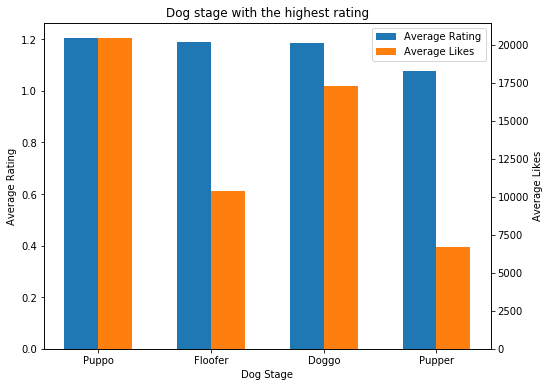

In [81]:
xlabels = df.groupby('dog_stage').mean().sort_values('true_rating', ascending= False).index.str.capitalize()
ratings = df.groupby('dog_stage').mean().sort_values('true_rating', ascending= False).true_rating.values
likes = df.groupby('dog_stage').mean().sort_values('true_rating', ascending= False).favorite_count.values
x= np.arange(len(xlabels))
width = 0.3

fig = plt.figure(figsize=[8,6])
ax= fig.add_subplot(111)
ax2=plt.twinx() #2nd y-axis

rects1 = ax.bar(x - width/2, ratings, width, color=sb.color_palette()[0]) 
rects2 = ax2.bar(x + width/2, likes, width, color=sb.color_palette()[1])

ax.set_title('Dog stage with the highest rating')
ax.set_xlabel('Dog Stage')
ax.set_xticks(x)
ax.set_xticklabels(xlabels)
ax.set_ylabel('Average Rating')
ax2.set_ylabel('Average Likes')


plt.legend((rects1[0], rects2[0]), ('Average Rating', 'Average Likes'));

### 4. Relationship between Twitter likes (favorite_count) and other variables

#### Overview

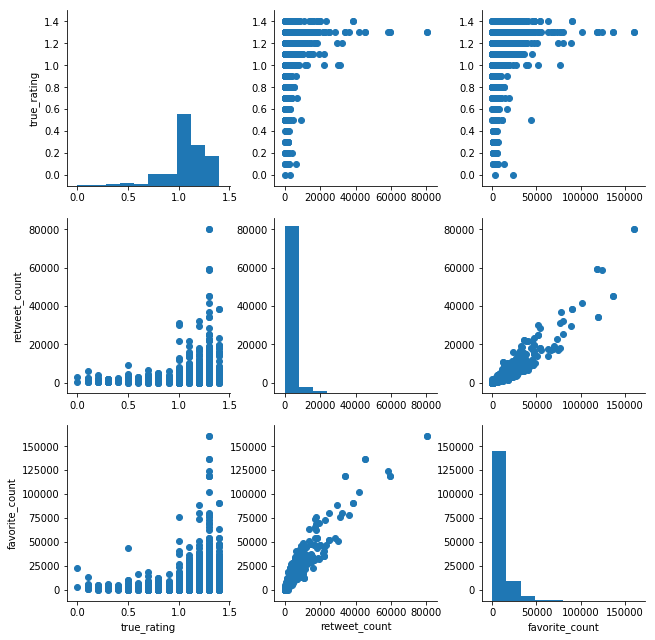

In [82]:
g = sb.PairGrid(data=df, vars = ['true_rating', 'retweet_count','favorite_count'], size=3)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [83]:
#Correlation matrix
df.corr()

,true_rating,tweet_id,retweet_count,favorite_count
true_rating,1.000000,0.512709,0.277515,0.358176
tweet_id,0.512709,1.000000,0.333590,0.550301
retweet_count,0.277515,0.333590,1.000000,0.931611
favorite_count,0.358176,0.550301,0.931611,1.000000


#### Closer look at the relationship betweenTwitter likes and @dog_rate ratings

In [84]:
df['intercept'] = 1
lm = sm.OLS(df['favorite_count'], df[['intercept','true_rating']])
results= lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     366.9
Date:                Tue, 17 Dec 2019   Prob (F-statistic):           2.10e-76
Time:                        05:31:37   Log-Likelihood:                -27005.
No. Observations:                2495   AIC:                         5.401e+04
Df Residuals:                    2493   BIC:                         5.403e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -1.469e+04   1233.155    -11.914      0.000   -1.71e+04   -1.23e+04
true_rating  2.168e+04   1131.767     19.155      0.000    1.95e+04    2.39e+04
==============================================================================
Omnibus:                     2605.098   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           193946.923
Skew:                           5.100   Prob(JB):                         0.00
Kurtosis:                      44.971   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

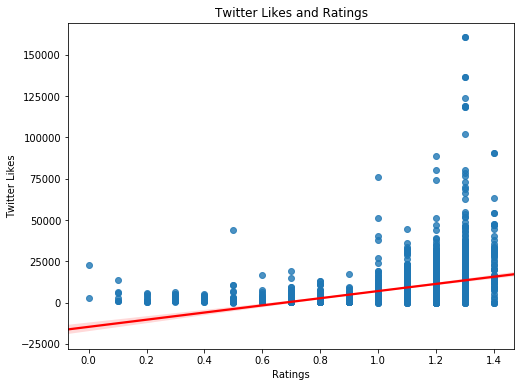

In [85]:
plt.figure(figsize= (8,6))
sb.regplot(data=df, x='true_rating', y='favorite_count', line_kws={'color':'red'})
plt.title('Twitter Likes and Ratings')
plt.xlabel('Ratings')
plt.ylabel('Twitter Likes');

A correlation coefficient of 0.36 indicates there is a weak relationship between @dog_rate ratings and Twitter likes.  Moreover, the R-squared of this linear regression model is 0.131.  This means there is no indication that the ratings by @dog_rates have an impact on public likes, as only 13.1% of the variability in likes can be explained by @dog_rates ratings.

#### Closer look at the relationship between Twitter likes and retweet counts

In [86]:
lm = sm.OLS(df['favorite_count'], df[['intercept','retweet_count']])
results= lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 1.638e+04
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:31:38   Log-Likelihood:                -24651.
No. Observations:                2495   AIC:                         4.931e+04
Df Residuals:                    2493   BIC:                         4.932e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      2050.7067    107.136     19.141      0.000    1840.622    2260.791
retweet_count     2.4690      0.019    127.981      0.000       2.431       2.507
==============================================================================
Omnibus:                      779.015   Durbin-Watson:                   0.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17047.836
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                      15.665   Cond. No.                     6.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

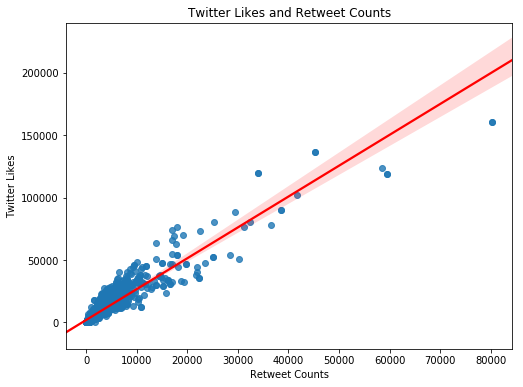

In [87]:
plt.figure(figsize=[8,6])
sb.regplot(data=df, x='retweet_count', y='favorite_count', line_kws= {'color':'red'})
plt.title('Twitter Likes and Retweet Counts')
plt.xlabel('Retweet Counts')
plt.ylabel('Twitter Likes');

A correlation coefficient of 0.93 indicates there is a strong relationship between retweet counts and Twitter likes.  This relationship can also be verified by the linear regression model above, which has an extremely low p-value indicating that an increase of 1 retweet is associated with an increase of around 2.5 likes.  Moreover, an R-squared of 0.858 means that retweet counts can explain almost 86% of the variance in likes, further cementing the relationship between the 2 variables.